In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [3]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


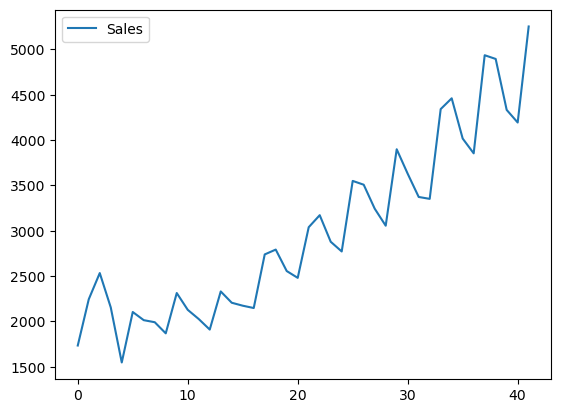

In [6]:
data.plot()
plt.show()

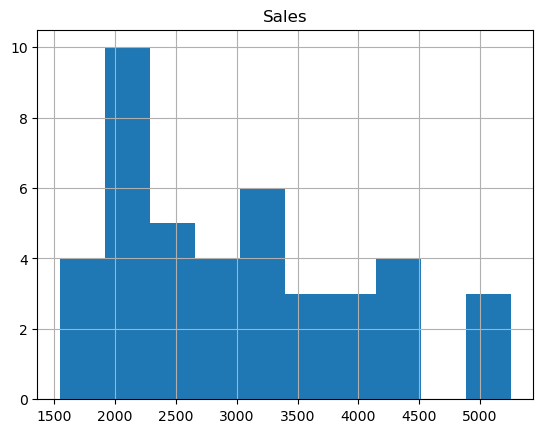

In [7]:
data.hist()
plt.show()

In [8]:
data['Quarter_Year'] = data['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))

In [9]:
data.head()

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


In [10]:
data['date'] = (pd.to_datetime(data['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))

In [11]:
data.head()

,Quarter,Sales,Quarter_Year,date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Quarter       42 non-null     object        
 1   Sales         42 non-null     float64       
 2   Quarter_Year  42 non-null     object        
 3   date          42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.4+ KB


In [13]:
data.drop(columns=['Quarter','Quarter_Year'],inplace=True)

In [14]:
data.head()

,Sales,date
0,1734.827000,1986-01-01
1,2244.960999,1986-04-01
2,2533.804993,1986-07-01
3,2154.962997,1986-10-01
4,1547.818996,1987-01-01


In [15]:
data.isnull().sum()

Sales    0
date     0
dtype: int64

In [16]:
data[data.duplicated()]

,Sales,date


In [17]:
Df = data[['date','Sales']]

In [18]:
Df.head(2)

,date,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999


In [19]:
Df.set_index('date',inplace=True)

In [20]:
Df.head(2)

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999


In [21]:
Df.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='date')

In [22]:
new_data = Df.copy()

In [23]:
new_data.head(2)

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999


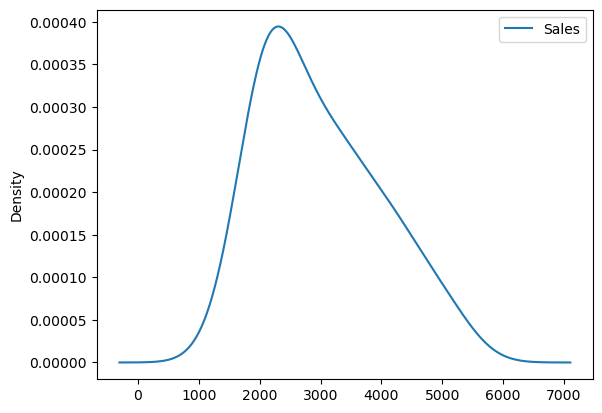

In [24]:
new_data.plot(kind='kde')
plt.show()

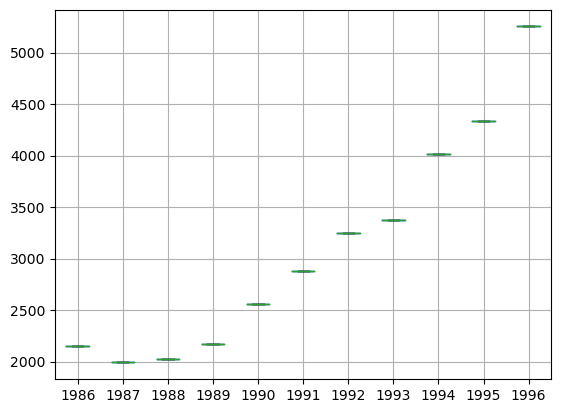

In [25]:
#Box and Whisker Plots by Interval
from pandas import Grouper
from pandas import DataFrame
groups = new_data.groupby(Grouper(freq='q'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values.reshape(-1,)
years.boxplot()
plt.show()

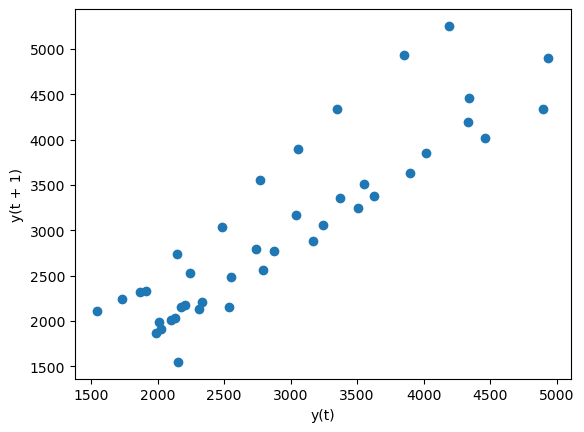

In [26]:
from pandas.plotting import lag_plot
lag_plot(new_data)
plt.show()

In [27]:
upsampled = new_data.resample('M').mean()
print(upsampled.head(32))

                  Sales
date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996
1987-02-28          NaN
1987-03-31          NaN
1987-04-30  2104.411995
1987-05-31          NaN
1987-06-30          NaN
1987-07-31  2014.362999
1987-08-31          NaN
1987-09-30          NaN
1987-10-31  1991.746998
1987-11-30          NaN
1987-12-31          NaN
1988-01-31  1869.049999
1988-02-29          NaN
1988-03-31          NaN
1988-04-30  2313.631996
1988-05-31          NaN
1988-06-30          NaN
1988-07-31  2128.320000
1988-08-31          NaN


                  Sales
date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330
1987-01-31  1547.818996
1987-02-28  1733.349996
1987-03-31  1918.880995


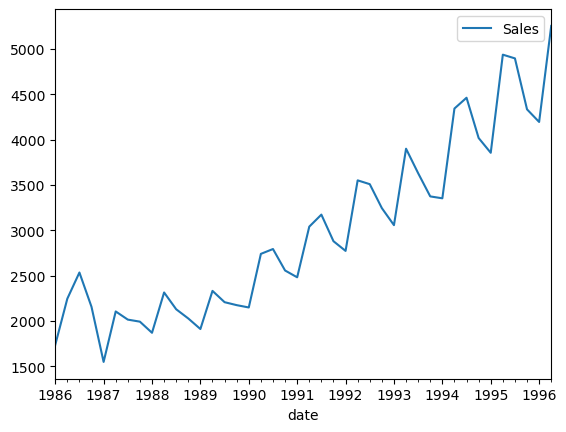

In [28]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(15))
interpolated.plot()
plt.show()

In [29]:
interpolated

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


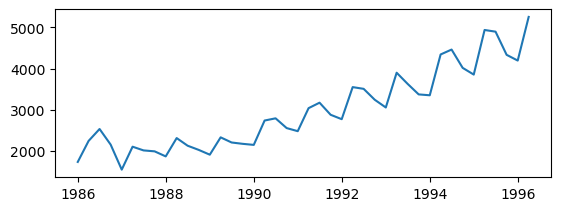

In [30]:
plt.subplot(211)
plt.plot(new_data)

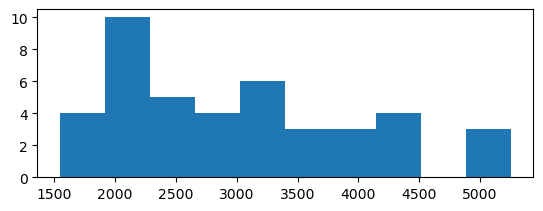

In [31]:
plt.subplot(212)
plt.hist(new_data)
plt.show()

In [32]:
from numpy import sqrt
dataframe = DataFrame(new_data.values)
dataframe.columns = ['Sales']
dataframe['Sales'] = sqrt(dataframe['Sales'])

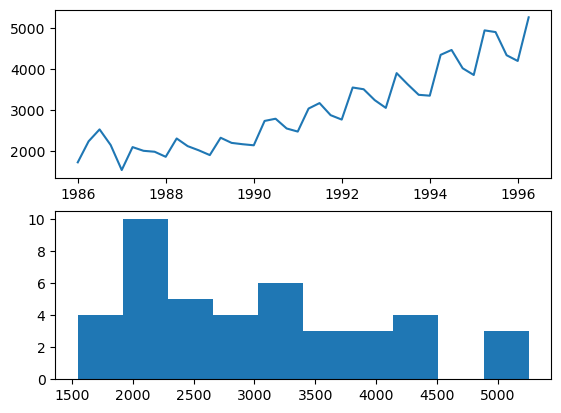

In [33]:
# line plot
plt.subplot(211)
plt.plot(new_data['Sales'])
# histogram
plt.subplot(212)
plt.hist(new_data['Sales'])
plt.show()

In [34]:
X = interpolated.head(112)
y = interpolated.tail(12)

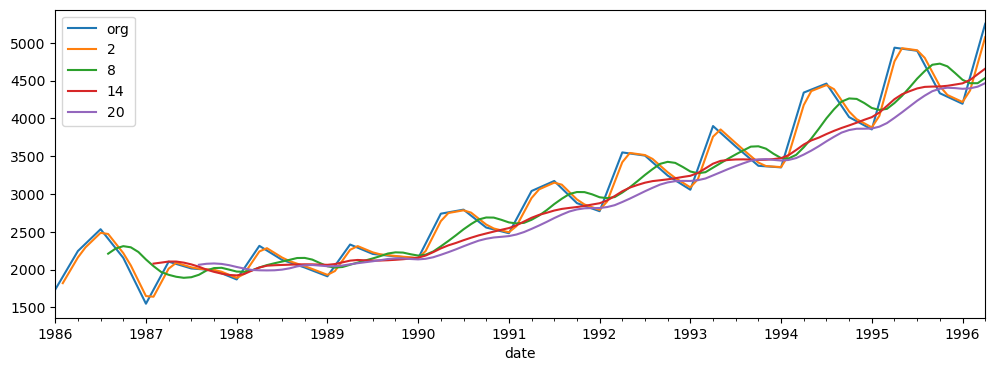

In [35]:
plt.figure(figsize=(12,4))
interpolated.Sales.plot(label="org")
for i in range(2,24,6):
    interpolated["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

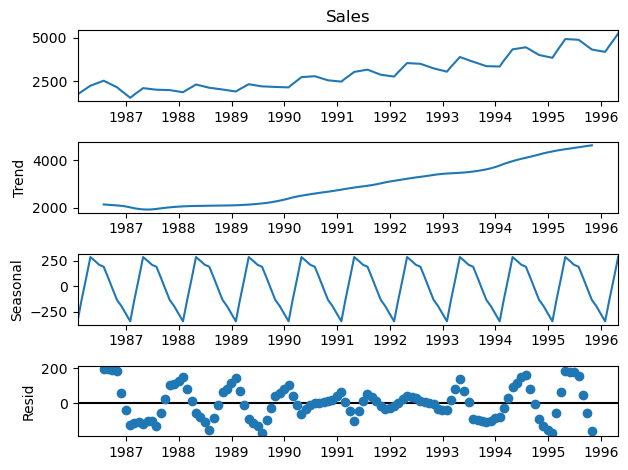

In [36]:
decompose_ts_add = seasonal_decompose(interpolated.Sales,period=12)  
decompose_ts_add.plot()
plt.show()
# result = seasonal_decompose(data['Revenue Index'], model='multiplicative', period=12)

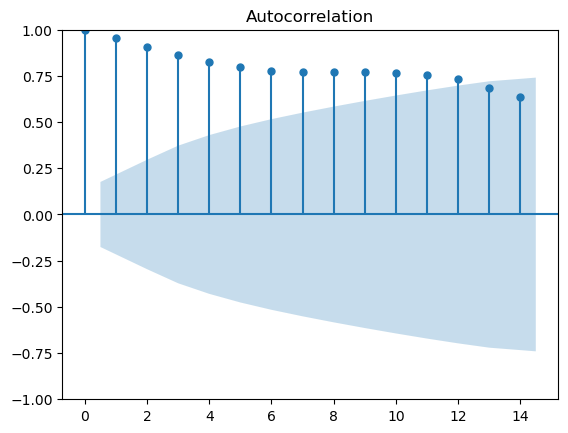

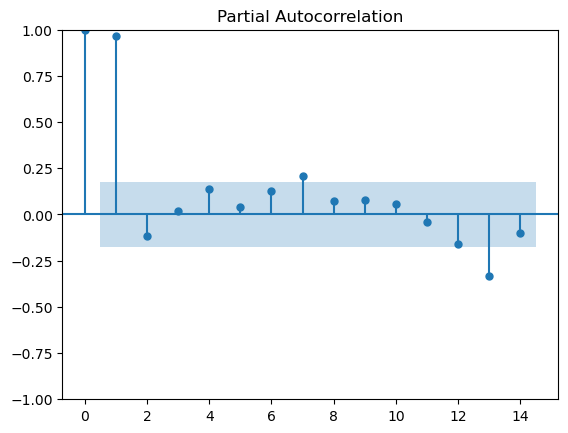

In [37]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated.Sales,lags=14)
tsa_plots.plot_pacf(interpolated.Sales,lags=14)
plt.show()

# Evaluation Metric MAPE

In [38]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [39]:
ses_model = SimpleExpSmoothing(X["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = y.index[0],end = y.index[-1])
MAPE(pred_ses,y.Sales)

7.528920151221705

# Holt method

In [40]:
hw_model = Holt(X["Sales"]).fit(smoothing_level=0.1, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = y.index[0],end = y.index[-1])
MAPE(pred_hw,y.Sales)

7.971543852025333

In [41]:
hwe_model_add_add = ExponentialSmoothing(X["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_trend=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = y.index[0],end = y.index[-1])
MAPE(pred_hwe_add_add,y.Sales)

5.072352949061625

In [42]:
hwe_model_mul_add = ExponentialSmoothing(X["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_trend=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = y.index[0],end = y.index[-1])
MAPE(pred_hwe_mul_add,y.Sales)

4.767933956510746

In [43]:
rmse_hwe_mul_add = sqrt(mean_squared_error(pred_hwe_mul_add,y.Sales))
rmse_hwe_mul_add

249.3716445007406

#  combining train and test

In [44]:
hwe_model_add_add = ExponentialSmoothing(interpolated["Sales"],seasonal="add",trend="add",seasonal_periods=10).fit()

In [45]:
hwe_model_add_add.forecast(10)

1996-05-31    5655.324123
1996-06-30    6054.967219
1996-07-31    6435.094479
1996-08-31    6805.469250
1996-09-30    7109.672192
1996-10-31    7440.590214
1996-11-30    7705.784980
1996-12-31    8064.821602
1997-01-31    8365.203568
1997-02-28    8734.062353
Freq: M, dtype: float64

In [46]:
interpolated

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [47]:
interpolated.reset_index(inplace=True)

In [48]:
interpolated['t'] = 1

In [49]:
interpolated

,date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,1
2,1986-03-31,2074.916332,1
3,1986-04-30,2244.960999,1
4,1986-05-31,2341.242330,1
...,...,...,...
119,1995-12-31,4240.333333,1
120,1996-01-31,4194.000000,1
121,1996-02-29,4547.000000,1
122,1996-03-31,4900.000000,1


In [50]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1

In [51]:
interpolated

,date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,2
2,1986-03-31,2074.916332,3
3,1986-04-30,2244.960999,4
4,1986-05-31,2341.242330,5
...,...,...,...
119,1995-12-31,4240.333333,120
120,1996-01-31,4194.000000,121
121,1996-02-29,4547.000000,122
122,1996-03-31,4900.000000,123


In [52]:
interpolated['t_sq'] = (interpolated['t'])**2

In [53]:
interpolated.head()

,date,Sales,t,t_sq
0,1986-01-31,1734.827000,1,1
1,1986-02-28,1904.871666,2,4
2,1986-03-31,2074.916332,3,9
3,1986-04-30,2244.960999,4,16
4,1986-05-31,2341.242330,5,25


In [54]:
interpolated["month"] = interpolated.date.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.date.dt.strftime("%Y") # year extraction

In [55]:
interpolated.head()

,date,Sales,t,t_sq,month,year
0,1986-01-31,1734.827000,1,1,Jan,1986
1,1986-02-28,1904.871666,2,4,Feb,1986
2,1986-03-31,2074.916332,3,9,Mar,1986
3,1986-04-30,2244.960999,4,16,Apr,1986
4,1986-05-31,2341.242330,5,25,May,1986


In [56]:
months = pd.get_dummies(interpolated['month'])

In [57]:
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,1,0,0,0,0,0,0,0,0,0
120,0,0,0,0,1,0,0,0,0,0,0,0
121,0,0,0,1,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,1,0,0,0,0


In [58]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [59]:
new_DF = pd.concat([interpolated,months],axis=1)

In [60]:
new_DF.head()

,date,Sales,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0


In [61]:
new_DF['log_sales'] = np.log(new_DF['Sales'])

In [62]:
new_DF.head()

,date,Sales,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,7.758437


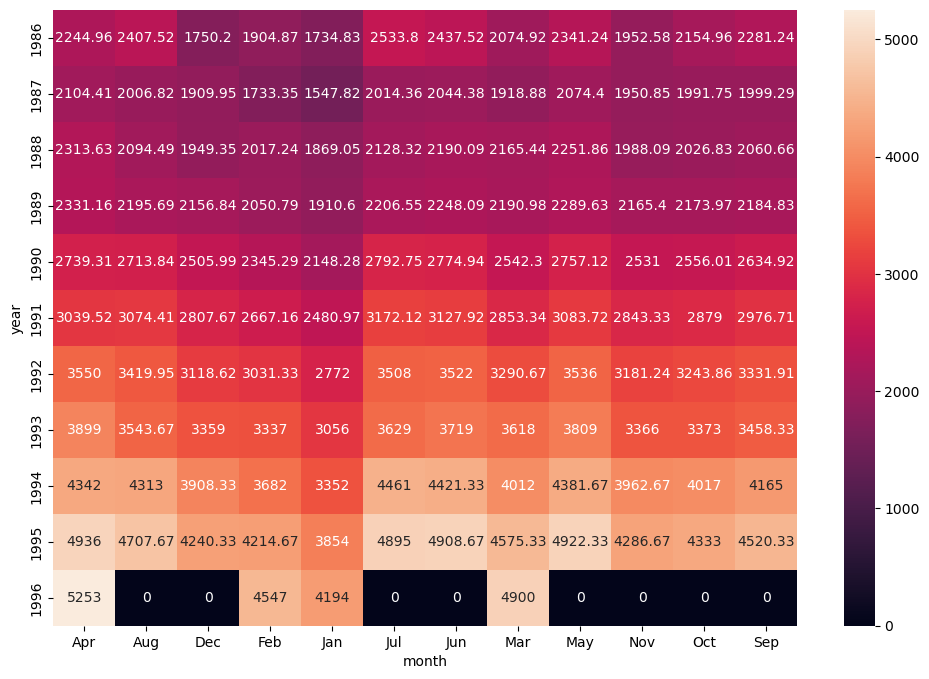

In [63]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=new_DF,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()

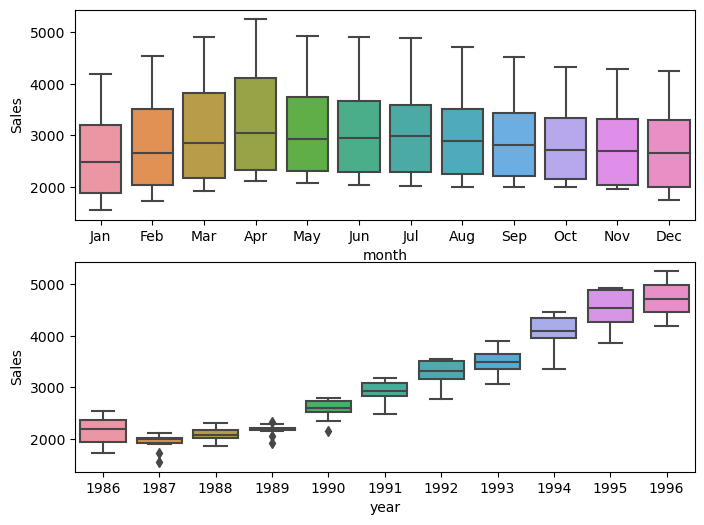

In [64]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data= new_DF)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=new_DF)
plt.show()

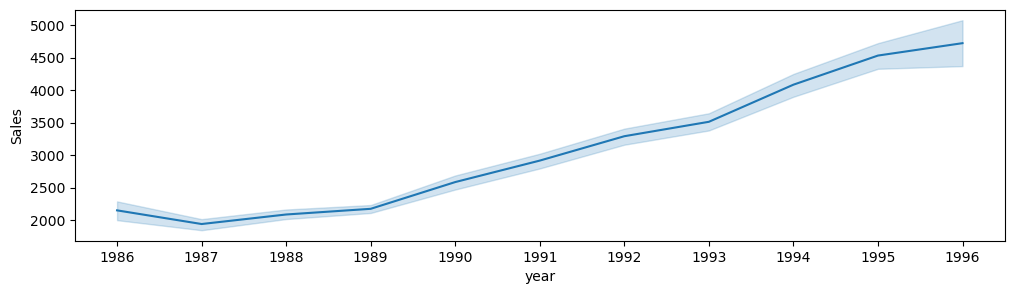

In [65]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=new_DF)
plt.show()

In [66]:
X_train = new_DF.head(110) # training data
y_test = new_DF.tail(14) # test Data

In [67]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=X_train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(y_test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(y_test['Sales'])-np.array(pred_linear))**2))
rmse_linear

638.1208225922795

In [68]:
#Exponential
Exp = smf.ols('log_sales~t',data=X_train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(y_test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(y_test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

494.44069305457606

In [69]:
#Quadratic 

Quad = smf.ols('Sales~t+t_sq',data=X_train).fit()
pred_Quad = pd.Series(Quad.predict(y_test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(y_test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

387.28160082925666

In [70]:
#Additive seasonality 

add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=X_train).fit()
pred_add_sea = pd.Series(add_sea.predict(y_test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(y_test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1881.8135899060212

In [71]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=X_train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(y_test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(y_test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

242.77660443460377

In [72]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = X_train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(y_test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(y_test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1973.2620608123054

In [73]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = X_train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(y_test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(y_test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

275.27503211159893

In [74]:
#Compareing the results 
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,242.776604
6,rmse_Mult_add_sea,275.275032
2,rmse_Quad,387.281601
1,rmse_Exp,494.440693
0,rmse_linear,638.120823
3,rmse_add_sea,1881.813590
5,rmse_Mult_sea,1973.262061
